<a href="https://colab.research.google.com/github/vaibhav251999/EDA-capstone-project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:

#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Almabetter/capstone projects/EDA/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
col=[col for col in df.columns if df[col].isna().sum()!=0]
df.loc[:,col]


,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [5]:
df.loc[:,df.isna().sum()!=0]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [14]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

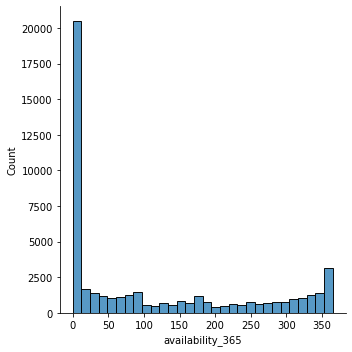

In [ ]:
sns.displot(df['availability_365'])